### Assignment 2

#### Importing Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#### Loading the dataset

In [160]:
titanic = pd.read_csv('titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [161]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### Performing below visualizations
##### Univariate Analysis

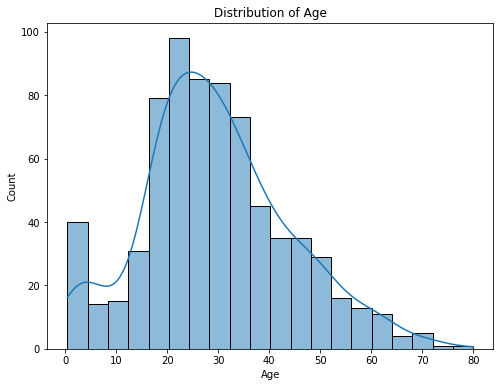

In [163]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Bi - Variate Analysis

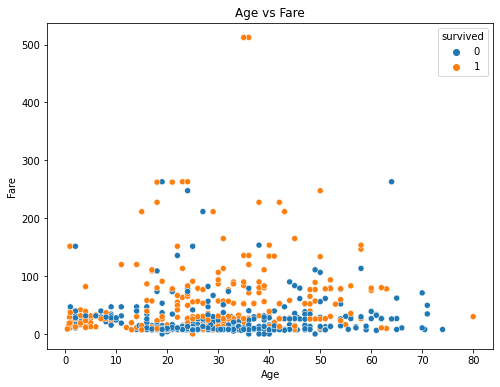

In [164]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

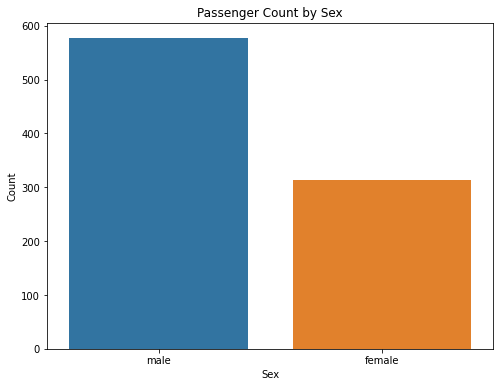

In [165]:
# Bar plot
sex_counts = titanic['sex'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

##### Multi - Variate Analysis

In [166]:
corr = titanic.corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


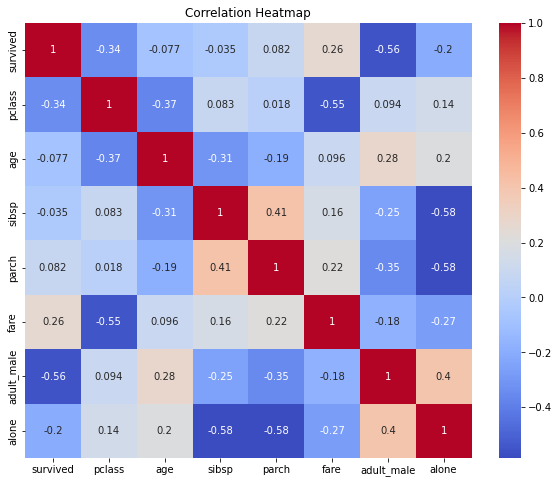

In [167]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

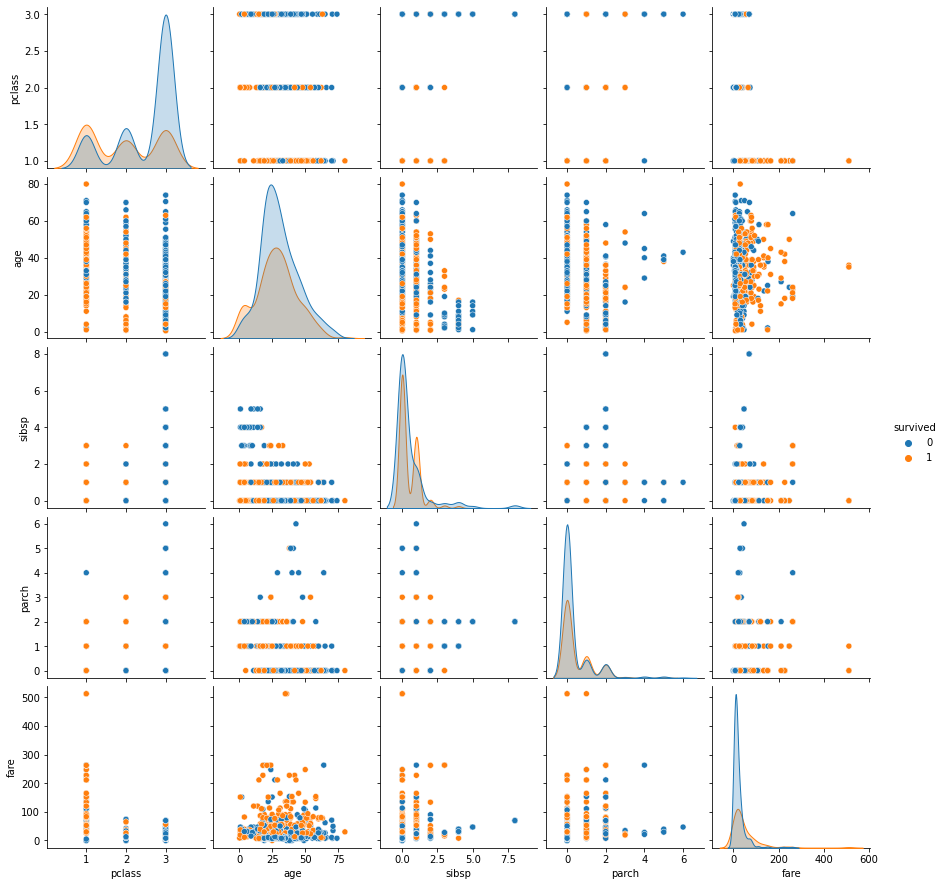

In [168]:
# Pair plot
columns = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
sns.pairplot(data=titanic[columns], hue='survived')
plt.show()

#### Performing descriptive statistics on the dataset

In [169]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
titanic.mean()

C:\Users\User\AppData\Local\Temp/ipykernel_11000/929819788.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.mean()


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [171]:
titanic.median()

C:\Users\User\AppData\Local\Temp/ipykernel_11000/502188208.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.median()


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [172]:
titanic.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [173]:
titanic.var()

C:\Users\User\AppData\Local\Temp/ipykernel_11000/3881755987.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.var()


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [174]:
titanic.std()

C:\Users\User\AppData\Local\Temp/ipykernel_11000/4084194749.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.std()


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

#### Handling the missing values

In [175]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [176]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [177]:
# age
median_age = titanic['age'].median()
titanic['age'].fillna(median_age, inplace=True)

In [178]:
# embarked
mode_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(mode_embarked, inplace=True)

In [179]:
# deck
# Since almost 77% of data is missing in the deck column, we can drop the column
titanic = titanic.drop('deck', axis=1)

In [180]:
# embark_town
mode_embark_town = titanic['embark_town'].mode()[0]
titanic['embark_town'].fillna(mode_embark_town, inplace=True)

In [181]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Finding the outliers and replacing the outliers

<AxesSubplot:>

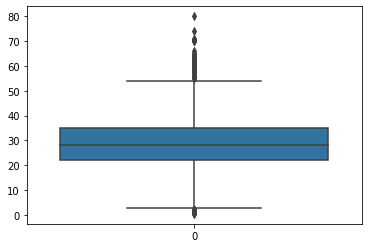

In [182]:
# age
sns.boxplot(titanic['age'])

In [183]:
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
titanic['age'] = np.where(titanic['age']>upper_whisker, upper_whisker, np.where(titanic['age']<lower_whisker, lower_whisker, titanic['age']))

<AxesSubplot:>

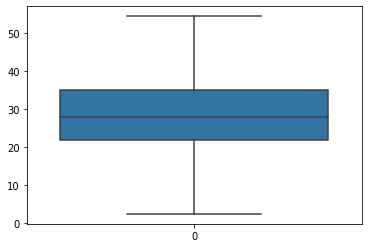

In [184]:
sns.boxplot(titanic['age'])

<AxesSubplot:>

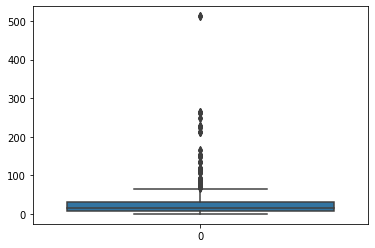

In [185]:
# fare
sns.boxplot(titanic['fare'])

In [186]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
titanic['fare'] = np.where(titanic['fare']>upper_whisker, upper_whisker, np.where(titanic['fare']<lower_whisker, lower_whisker, titanic['fare']))

<AxesSubplot:>

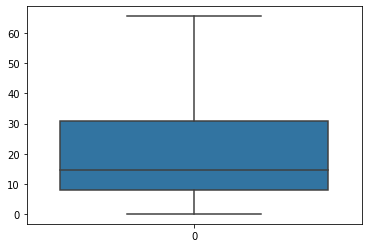

In [187]:
sns.boxplot(titanic['fare'])

#### Checking for Categorical columns and performing encoding

In [188]:
# Checking for categorical columns
categorical_columns = titanic.select_dtypes(include=['object', 'bool']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    titanic[column] = label_encoder.fit_transform(titanic[column])

In [189]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,65.6344,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


#### Spliting the data into dependent and independent variables

In [190]:
X = titanic.drop('survived', axis=1)  # Independent variables
y = titanic['survived']  # Dependent variable

In [191]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1,0,65.6344,0,0,2,0,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [192]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

#### Scaling the independent variables

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [194]:
X_scaled

array([[ 0.82737724,  0.73769513, -0.58343208, ...,  0.58595414,
        -0.78927234, -1.2316449 ],
       [-1.56610693, -1.35557354,  0.74268522, ..., -1.9423032 ,
         1.2669898 , -1.2316449 ],
       [ 0.82737724, -1.35557354, -0.25190275, ...,  0.58595414,
         1.2669898 ,  0.81192233],
       ...,
       [ 0.82737724, -1.35557354, -0.08613809, ...,  0.58595414,
        -0.78927234, -1.2316449 ],
       [-1.56610693,  0.73769513, -0.25190275, ..., -1.9423032 ,
         1.2669898 ,  0.81192233],
       [ 0.82737724,  0.73769513,  0.24539123, ..., -0.67817453,
        -0.78927234,  0.81192233]])

#### Spliting the data into training and testing

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [196]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-1.56610693  0.73769513  1.3643027  ...  0.58595414 -0.78927234
   0.81192233]
 [-0.36936484  0.73769513 -0.50054975 ...  0.58595414 -0.78927234
   0.81192233]
 [ 0.82737724  0.73769513  0.24539123 ...  0.58595414 -0.78927234
   0.81192233]
 ...
 [ 0.82737724  0.73769513  0.99133221 ...  0.58595414 -0.78927234
  -1.2316449 ]
 [-1.56610693 -1.35557354 -1.24649073 ...  0.58595414  1.2669898
  -1.2316449 ]
 [-1.56610693  0.73769513 -0.66631441 ...  0.58595414 -0.78927234
  -1.2316449 ]]
[[ 0.82737724  0.73769513 -0.08613809 ... -1.9423032   1.2669898
  -1.2316449 ]
 [-0.36936484  0.73769513  0.1625089  ...  0.58595414 -0.78927234
   0.81192233]
 [ 0.82737724  0.73769513 -0.74919674 ...  0.58595414 -0.78927234
   0.81192233]
 ...
 [ 0.82737724 -1.35557354  0.74268522 ...  0.58595414  1.2669898
  -1.2316449 ]
 [-0.36936484 -1.35557354 -0.99784373 ...  0.58595414  1.2669898
   0.81192233]
 [ 0.82737724 -1.35557354 -2.07531404 ...  0.58595414  1.2669898
  -1.2316449 ]]
331    0
733    0
382